<a href="https://colab.research.google.com/github/account1278/Rajnish-kumar/blob/main/Rajnish_kumar_Task5_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Level : advanced

Author : Rajnish kumar

The Sparks Foundation - GRIP June 2021

Task 5: Exploratory Data Analysis - Sports

IPL record analysis for making better decisions

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the data
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#checking for no. of rows and columns
df.shape

(756, 18)

In [6]:
#checking for null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df = df.dropna(subset=['city', 'winner', 'player_of_match','umpire1','umpire2'])
df.shape

(743, 18)

In [8]:
df['umpire3'] = df['umpire3'].replace(np.nan, 'Unknown')

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [10]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Year,Month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Unknown,2017,4
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Unknown,2017,4
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Unknown,2017,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Unknown,2017,4
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Unknown,2017,4


In [11]:
df.insert(loc=20, column='Day', value=(df.date.dt.dayofweek)+1)

In [12]:
#winners most times
df['winner'].sort_values().value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [13]:
df.loc[df['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
#we need to replace in other series like 'team1', 'team2',etc.
df[['team1','team2','toss_winner','winner']] = df[['team1','team2','toss_winner','winner']].apply(lambda val : val.str.replace('Rising Pune Supergiants','Rising Pune Supergiant') )

In [14]:
print(len(df['season'].unique()))
print(df['season'].unique())

12
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


In [15]:
#cities with no. of matches hosting 
city_host = df['city'].value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Visakhapatnam      12
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Abu Dhabi           7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


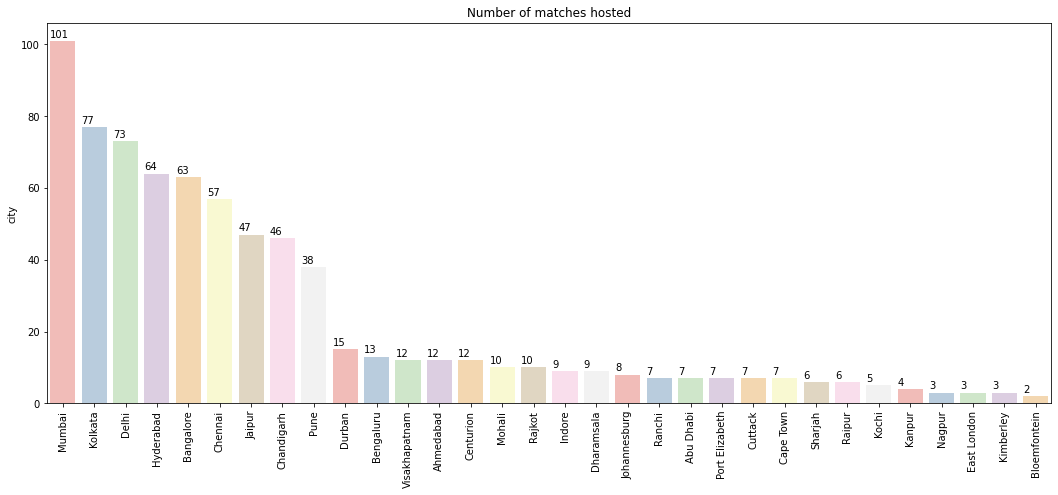

In [18]:
#then plotting it 
plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host, palette='Pastel1');

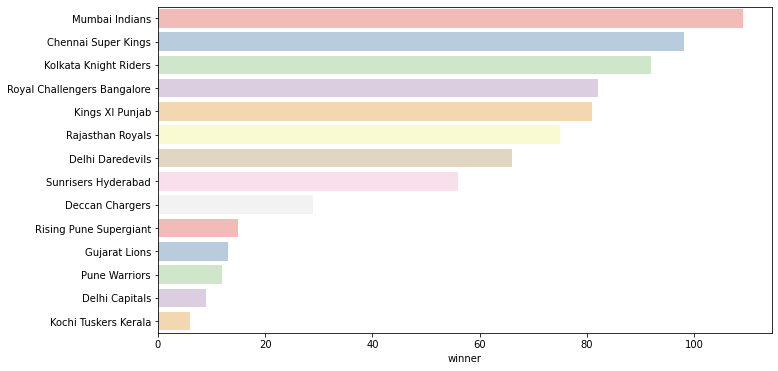

In [19]:
# We will see for most successful team of ipl
plt.figure(figsize=(11,6))
data = df['winner'].value_counts()
sns.barplot(y = data.index, x = data, palette='Pastel1' )

In [20]:
#Top 5 perfoming teams 
most_wins = df.groupby(by = ['winner'] )['city'].value_counts()
most_wins.sort_values(ascending = False).head()

winner                 city     
Mumbai Indians         Mumbai       53
Kolkata Knight Riders  Kolkata      45
Chennai Super Kings    Chennai      40
Rajasthan Royals       Jaipur       32
Sunrisers Hyderabad    Hyderabad    30
Name: city, dtype: int64

In [21]:
#counting the matches won by all teams
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [22]:
df['dl_applied'].value_counts()[1]

19

In [23]:
#No. of Wins per season of the ipl by each team 
wins_per_season = df.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [24]:
year = 2008
wins_per_season_df = pd.DataFrame(columns=['year', 'Team', 'Wins'])
for items in wins_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'Team': [items[0][1]],
            'Wins': [items[1]]
        })
        wins_per_season_df = wins_per_season_df.append(win_series)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 11)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


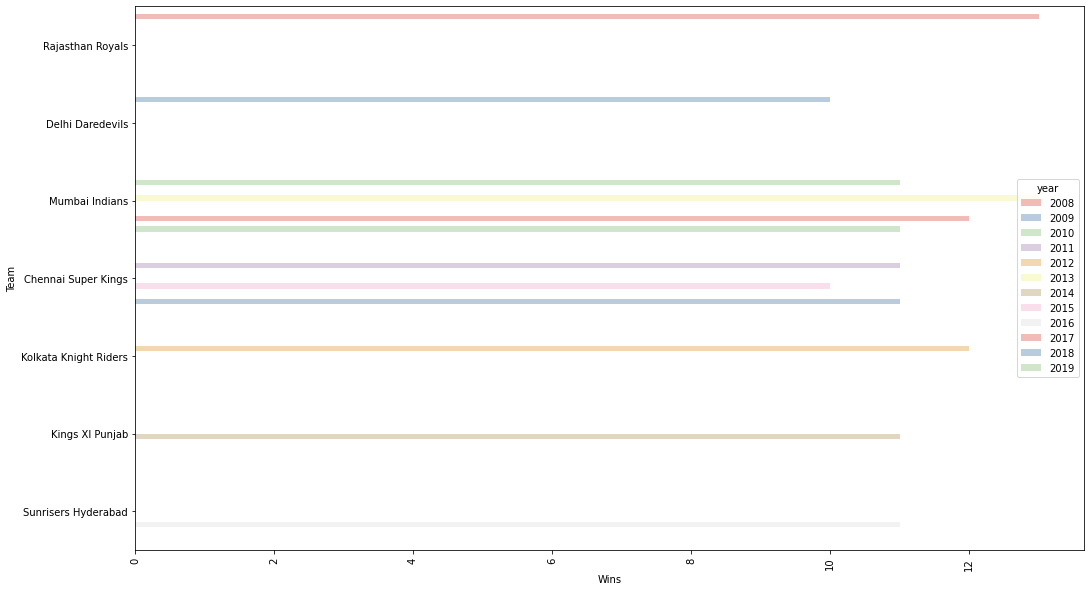

In [27]:
plt.figure(figsize=(17,10))
plt.xticks(rotation=90)
sns.barplot('Wins', 'Team', hue='year', data=wins_per_season_df, palette='Pastel1')

In [23]:
#winning the Toss and choosing to field or bat first
df['toss_decision'].value_counts()

field    455
bat      288
Name: toss_decision, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

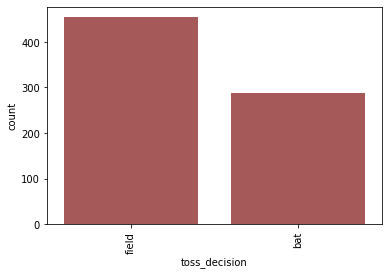

In [34]:
sns.countplot(x ='toss_decision', data = df ,color=(0.7, 0.3, 0.3, 0.7))
plt.xticks(rotation = 90)

In [36]:
#when toss winners won the match
toss_win_match = df[(df['toss_winner'] == df['winner'])]

In [37]:
#When toss winners lost the match
toss_win_lose_match = df[(df['toss_winner'] != df['winner'])]

In [38]:
toss_df = pd.DataFrame({"Team won the toss":[ toss_win_match.shape[0],toss_win_lose_match.shape[0]  ]}, index = ['Match won', 'Match Lost']  )

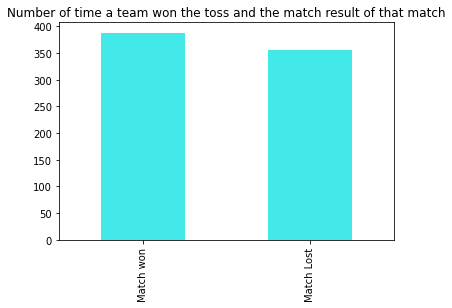

In [46]:
toss_df.plot( kind = 'bar' , legend = False , title = "Number of time a team won the toss and the match result of that match", color=(0.18, 0.9, 0.9, 0.9))

In [47]:
#Analysis based on, after winning the toss, elect to : bat or field
batting_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner']]
fielding_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'),  ['id', 'winner']]

In [48]:
batting_first_won_df = batting_first_won['winner'].value_counts()
fielding_first_won_df= fielding_first_won['winner'].value_counts()

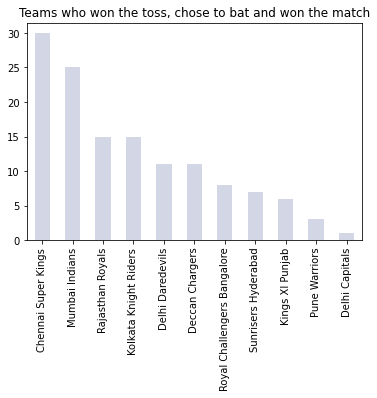

In [49]:
batting_first_won_df.plot(kind = 'bar', title = 'Teams who won the toss, chose to bat and won the match',color=(0.12, 0.2, 0.5, 0.2))

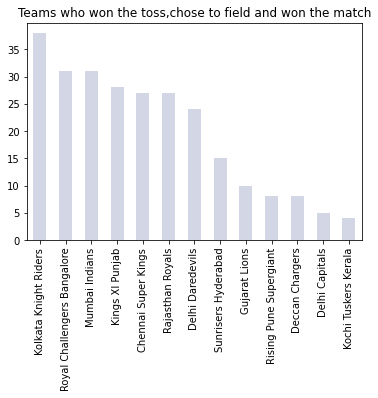

In [52]:
fielding_first_won_df.plot(kind = 'bar', title = 'Teams who won the toss,chose to field and won the match', color=(0.12, 0.2, 0.5, 0.2))

In [53]:
#Matches affected with the Duckworth–Lewis method
dl_data = df.loc[df['dl_applied'] != 0, ['id','season','Month','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','venue']]

In [54]:
dl_data['venue'].value_counts()

Eden Gardens                                           4
M Chinnaswamy Stadium                                  3
Feroz Shah Kotla                                       3
Rajiv Gandhi International Stadium, Uppal              2
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Sawai Mansingh Stadium                                 1
Nehru Stadium                                          1
Kingsmead                                              1
Newlands                                               1
SuperSport Park                                        1
Name: venue, dtype: int64

In [55]:
dl_data['toss_decision'].value_counts()

field    13
bat       6
Name: toss_decision, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

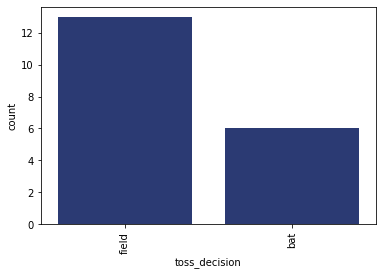

In [56]:
sns.countplot(x ='toss_decision', data = dl_data ,color=(0.12, 0.2, 0.5, 0.2))
plt.xticks(rotation = 90)

In [57]:
dl_wins = dl_data.groupby(by = 'toss_decision')['winner'].value_counts()
dl_wins

toss_decision  winner                     
bat            Chennai Super Kings            2
               Kolkata Knight Riders          2
               Kings XI Punjab                1
               Royal Challengers Bangalore    1
field          Delhi Daredevils               2
               Kolkata Knight Riders          2
               Rising Pune Supergiant         2
               Royal Challengers Bangalore    2
               Sunrisers Hyderabad            2
               Kings XI Punjab                1
               Kochi Tuskers Kerala           1
               Rajasthan Royals               1
Name: winner, dtype: int64

In [58]:
players = df.player_of_match.value_counts()
players.head()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: player_of_match, dtype: int64

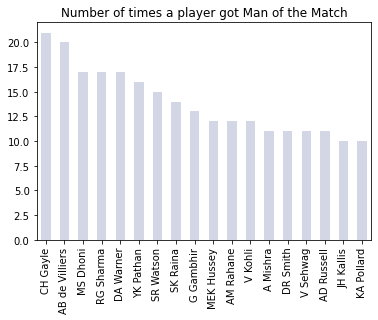

In [59]:
players[players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match',color=(0.12, 0.2, 0.5, 0.2))

From the above results we can see that Chris Gayle and AB de Villiers are the players who have won man of the match most times. it simply states that teams should go for these players during the ipl auction.

**Conclusion**

Following points can be drawn::

:: Mumbai has hosted the maximum number of IPL matches

:: Mumbai Indians is the most successful team of ipl

:: mi has secured the most number of wins on the past 12 years

:: Teams prefer to field first

:: There is no significant effect of toss winners on winning mathches

:: The Duckworth–Lewis method was applied most at Eden Gardens

:: Chris Gayle and AB de Villiers are match winners and teams should go for them.


**Task 5 finished** 